##EDA AND VISUALISATION
EDA and Data visualisation techniques are utilized before moving on with testing the hypothesis to get better understanding of the data. First summary statistics of three of the chosen major European economies are provided then visualised below. (Violent crime count is only for UK and crime rate is for Germany and France)

Dataset Loaded.


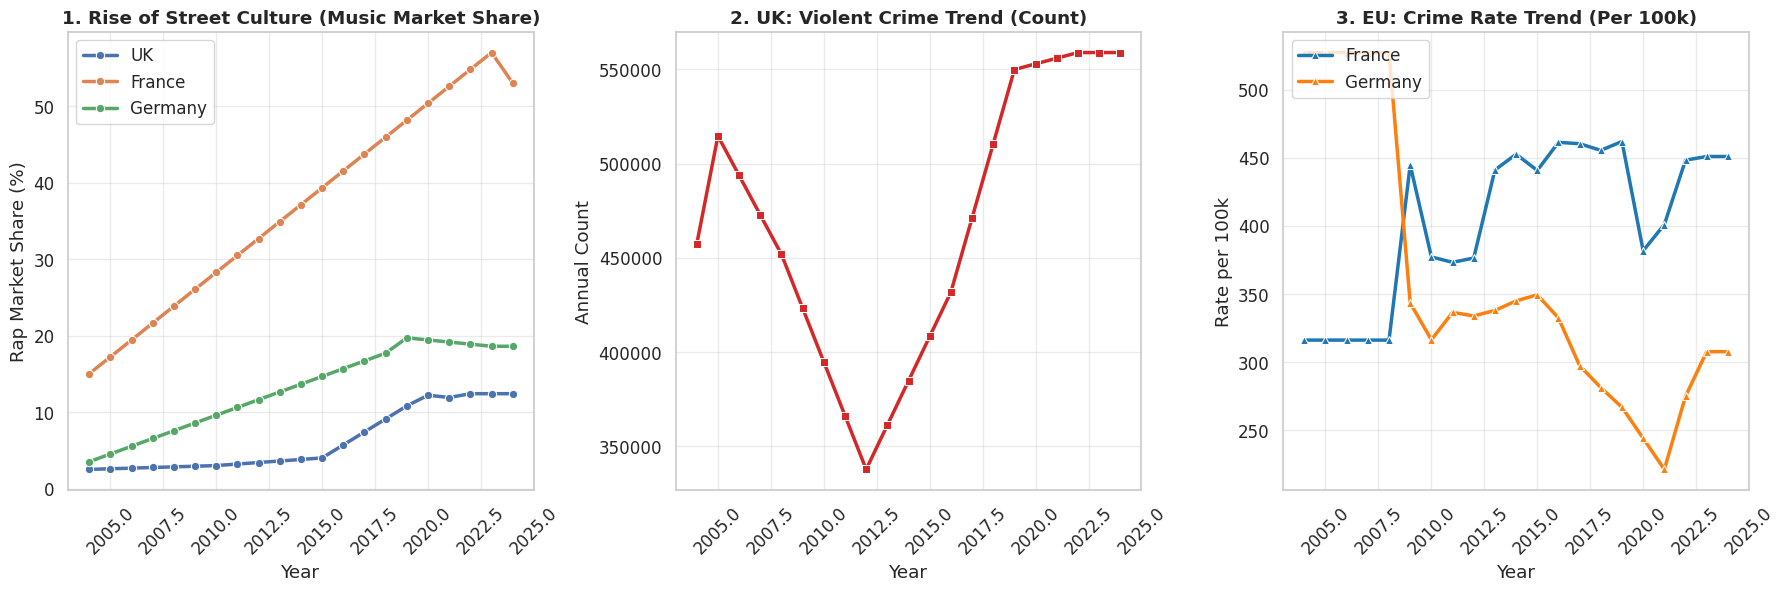

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD DATA
try:
    df = pd.read_csv('final_panel_dataset.csv')
    print("Dataset Loaded.")
except:
    print("Error: 'final_panel_dataset.csv' not found.")


# 1. PREPARE LABELS

label_map = {
    'Rap_Market_Share': 'Rap Market Share (%)',
    'Violent_Crime_Count': 'Violent Crime (Annual Count)',
    'Crime_Rate_Eurostat': 'Crime Rate (per 100k)',
    'Year': 'Year',
    'Country': 'Country'
}

df_plot = df.rename(columns=label_map)

# Define the variable names for easier plotting
var_market = label_map['Rap_Market_Share']
var_crime_uk = label_map['Violent_Crime_Count']
var_crime_eu = label_map['Crime_Rate_Eurostat']


# 2.VISUALIZATION

# Use a professional theme
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

plt.figure(figsize=(18, 6))

# --- PLOT 1: Music Market Share (All Countries) ---
ax1 = plt.subplot(1, 3, 1)
sns.lineplot(data=df_plot, x='Year', y=var_market, hue='Country',
             marker='o', linewidth=2.5, ax=ax1)

ax1.set_title('1. Rise of Street Culture (Music Market Share)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel(var_market)
ax1.legend(title=None, loc='upper left')
ax1.grid(True, alpha=0.4)

# --- PLOT 2: Violent Crime (UK Only - Count) ---
ax2 = plt.subplot(1, 3, 2)
uk_data = df_plot[df_plot['Country'] == 'UK']

sns.lineplot(data=uk_data, x='Year', y=var_crime_uk,
             color='#d62728', marker='s', linewidth=2.5, ax=ax2)

ax2.set_title('2. UK: Violent Crime Trend (Count)', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('Annual Count')
ax2.grid(True, alpha=0.4)

# --- PLOT 3: Crime Rate (France/Germany - Rate) ---
ax3 = plt.subplot(1, 3, 3)
eu_data = df_plot[df_plot['Country'].isin(['France', 'Germany'])]

sns.lineplot(data=eu_data, x='Year', y=var_crime_eu, hue='Country',
             marker='^', linewidth=2.5, palette=['#1f77b4', '#ff7f0e'], ax=ax3)

ax3.set_title('3. EU: Crime Rate Trend (Per 100k)', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Rate per 100k')
ax3.legend(title=None, loc='upper left')
ax3.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

Here the metrics included in our data our visualised followed by the correlation matrix depicting the correlation between each metric

Dataset Loaded.

=== TABLE 1: SUMMARY STATISTICS (Clean Labels) ===
Country                             France       Germany             UK
Drill Music Interest (Index)      8.501533     10.818903       6.527056
Streetwear Interest (Index)       6.467623      5.965278       6.001443
Street Culture Media (Index)      1.476671      2.485690       1.365440
Slang Adoption (Index)            0.472823      0.421116       7.442881
Urban Festivals (Index)           1.300024      6.404040       3.320226
Rap Market Share (%)             36.809524     13.016667       6.264286
Violent Crime (Annual Count)      0.000000      0.000000  467377.928571
Crime Rate (Per 100k)           402.721619    358.604762       0.000000
Drug Prevalence (%)              52.800000     40.500000      19.966667
School Exclusions (Per 1k)        0.000000      0.000000      46.671429
NEET Rate (%)                     8.142857      5.900952       7.309524
GDP Per Capita (€)            17718.242857  20274.328571       0.795

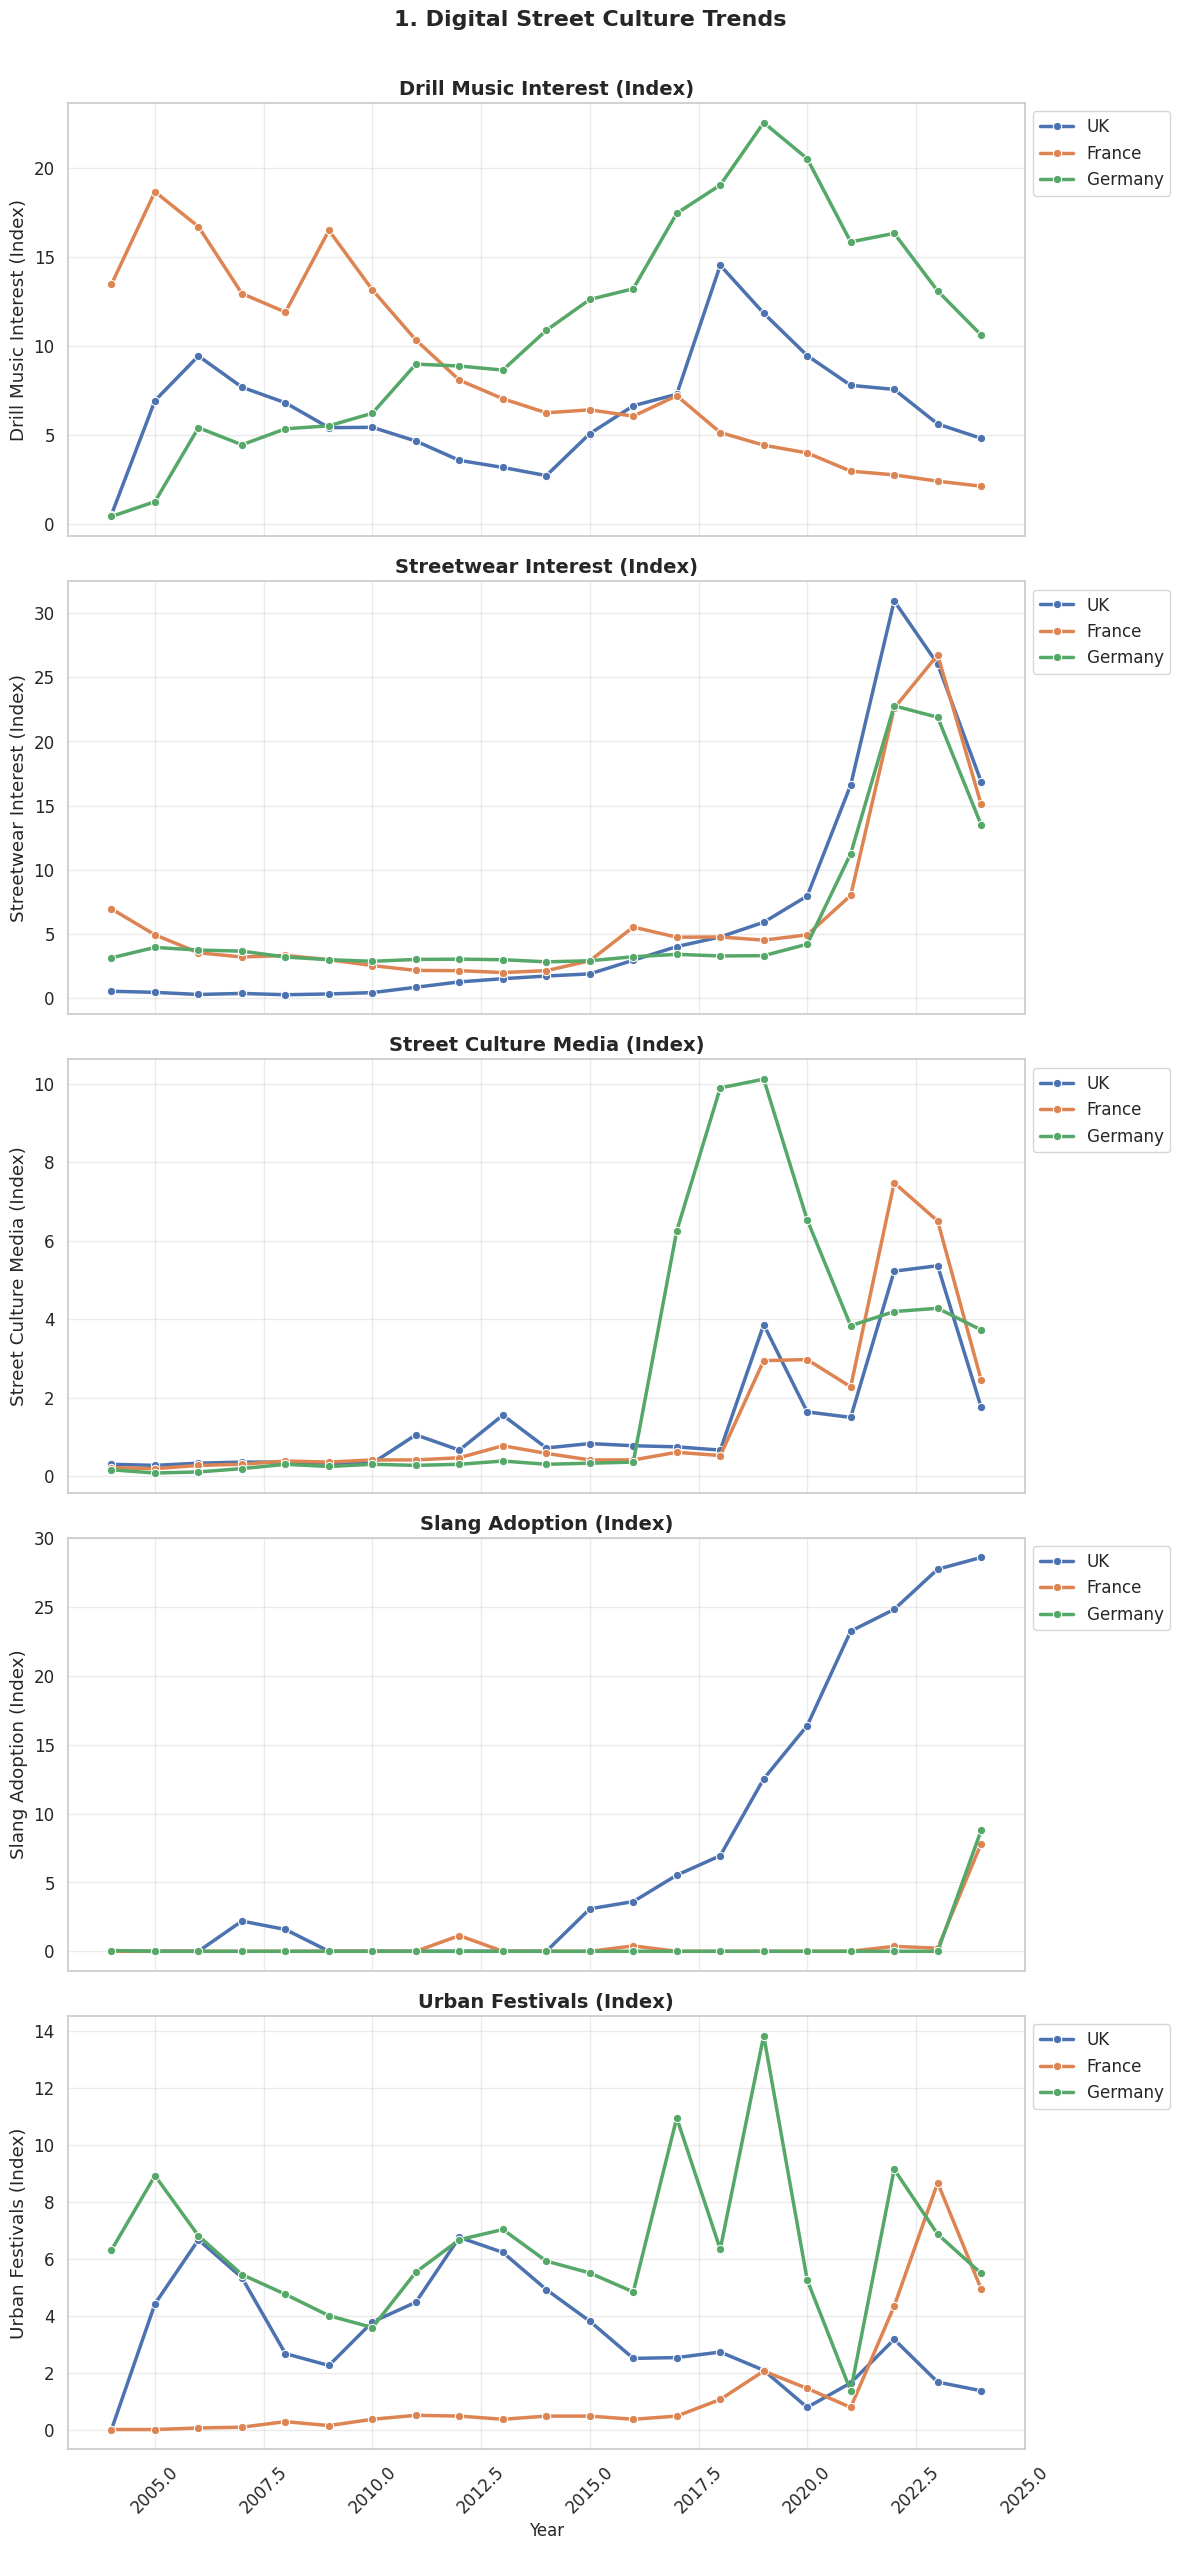

Generating 2. Economic Validation...


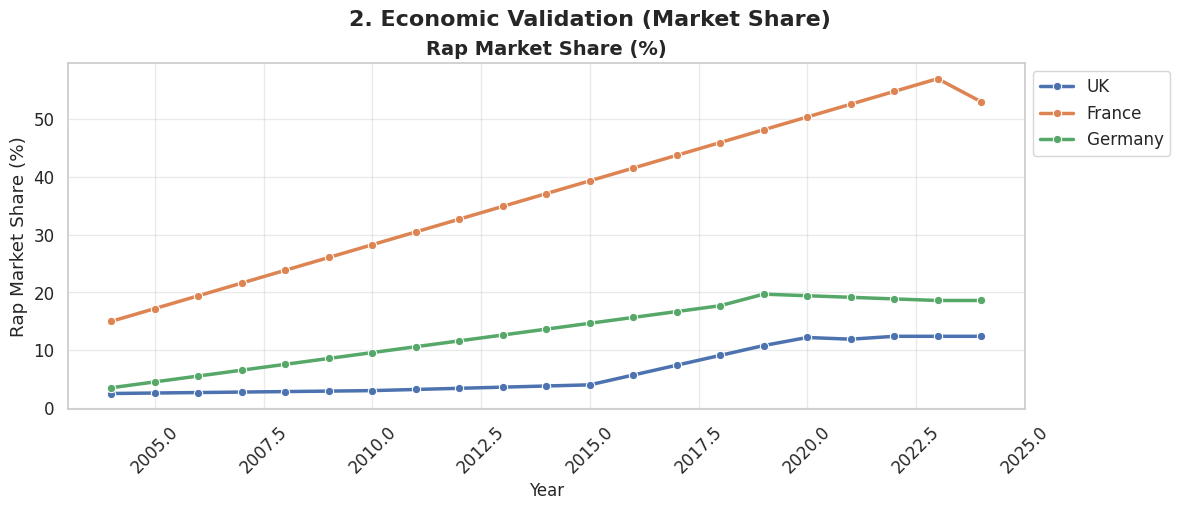

Generating 3. Crime Indicators...


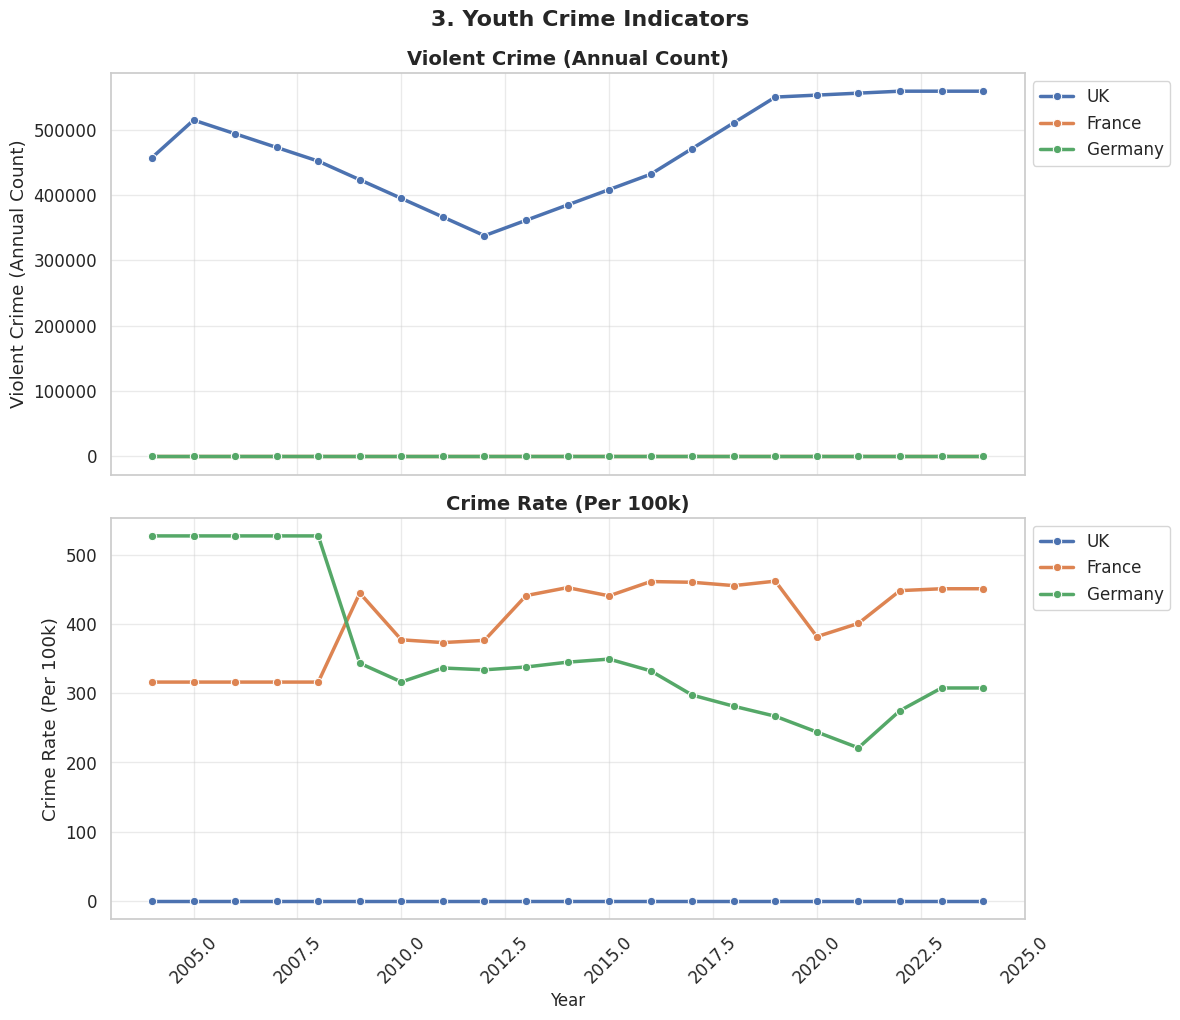

Generating 4. Social Risk...


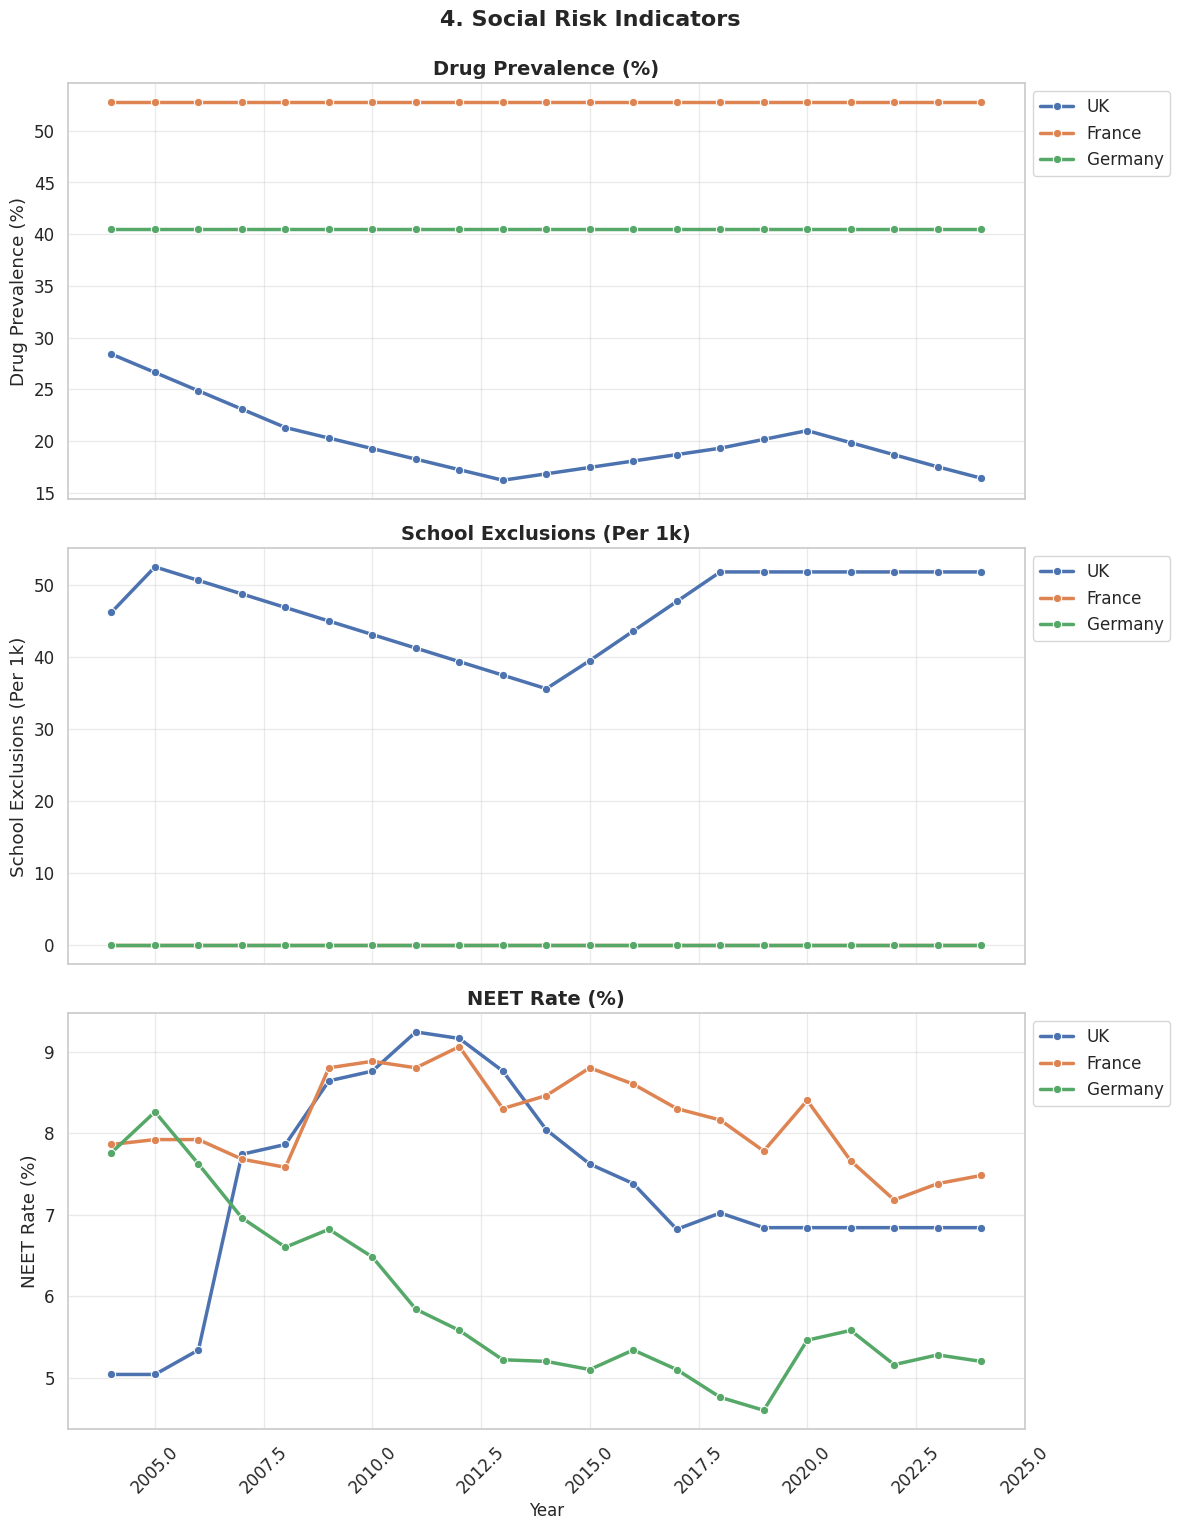

Generating 5. Controls...


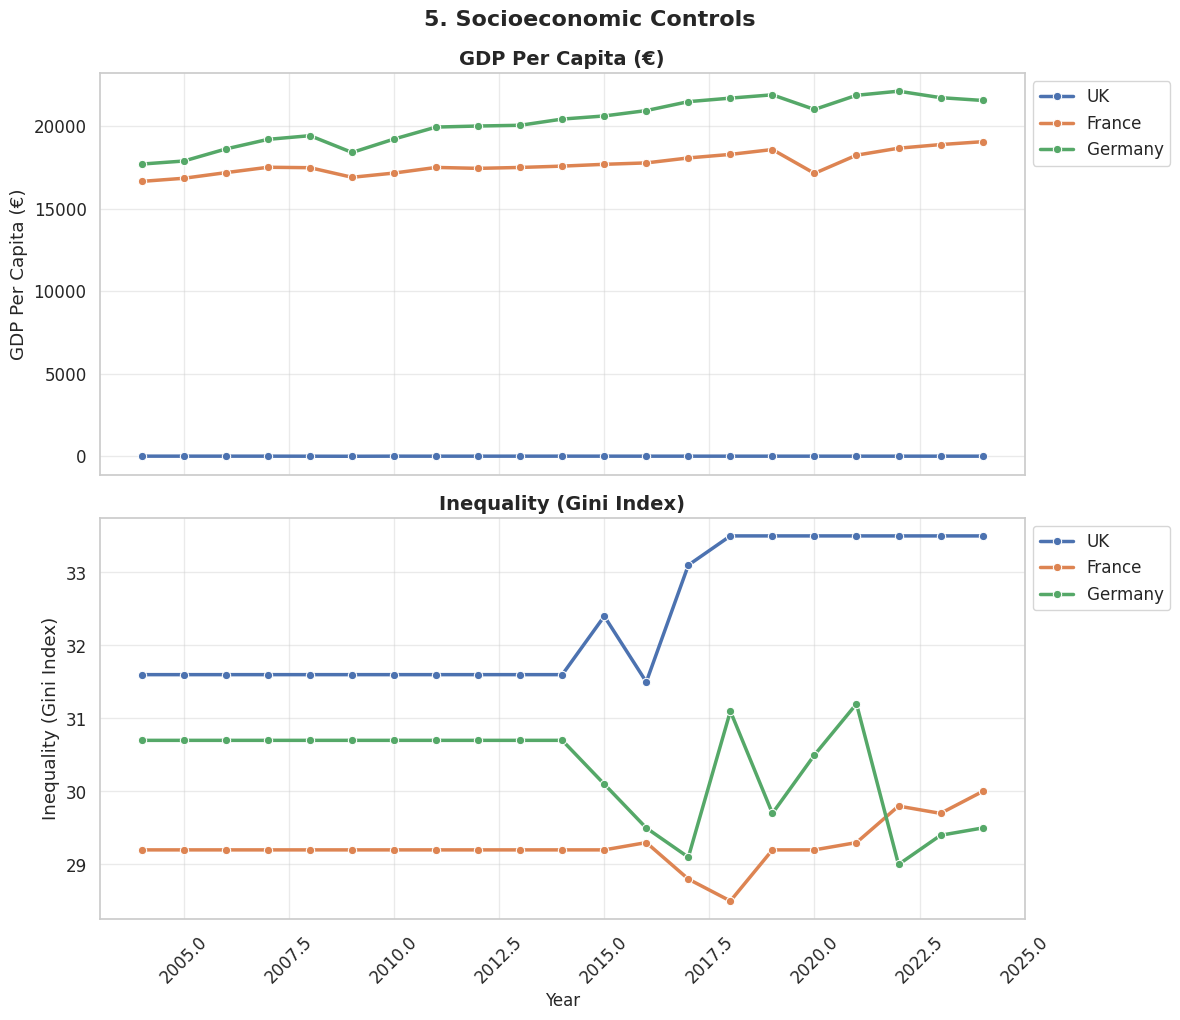

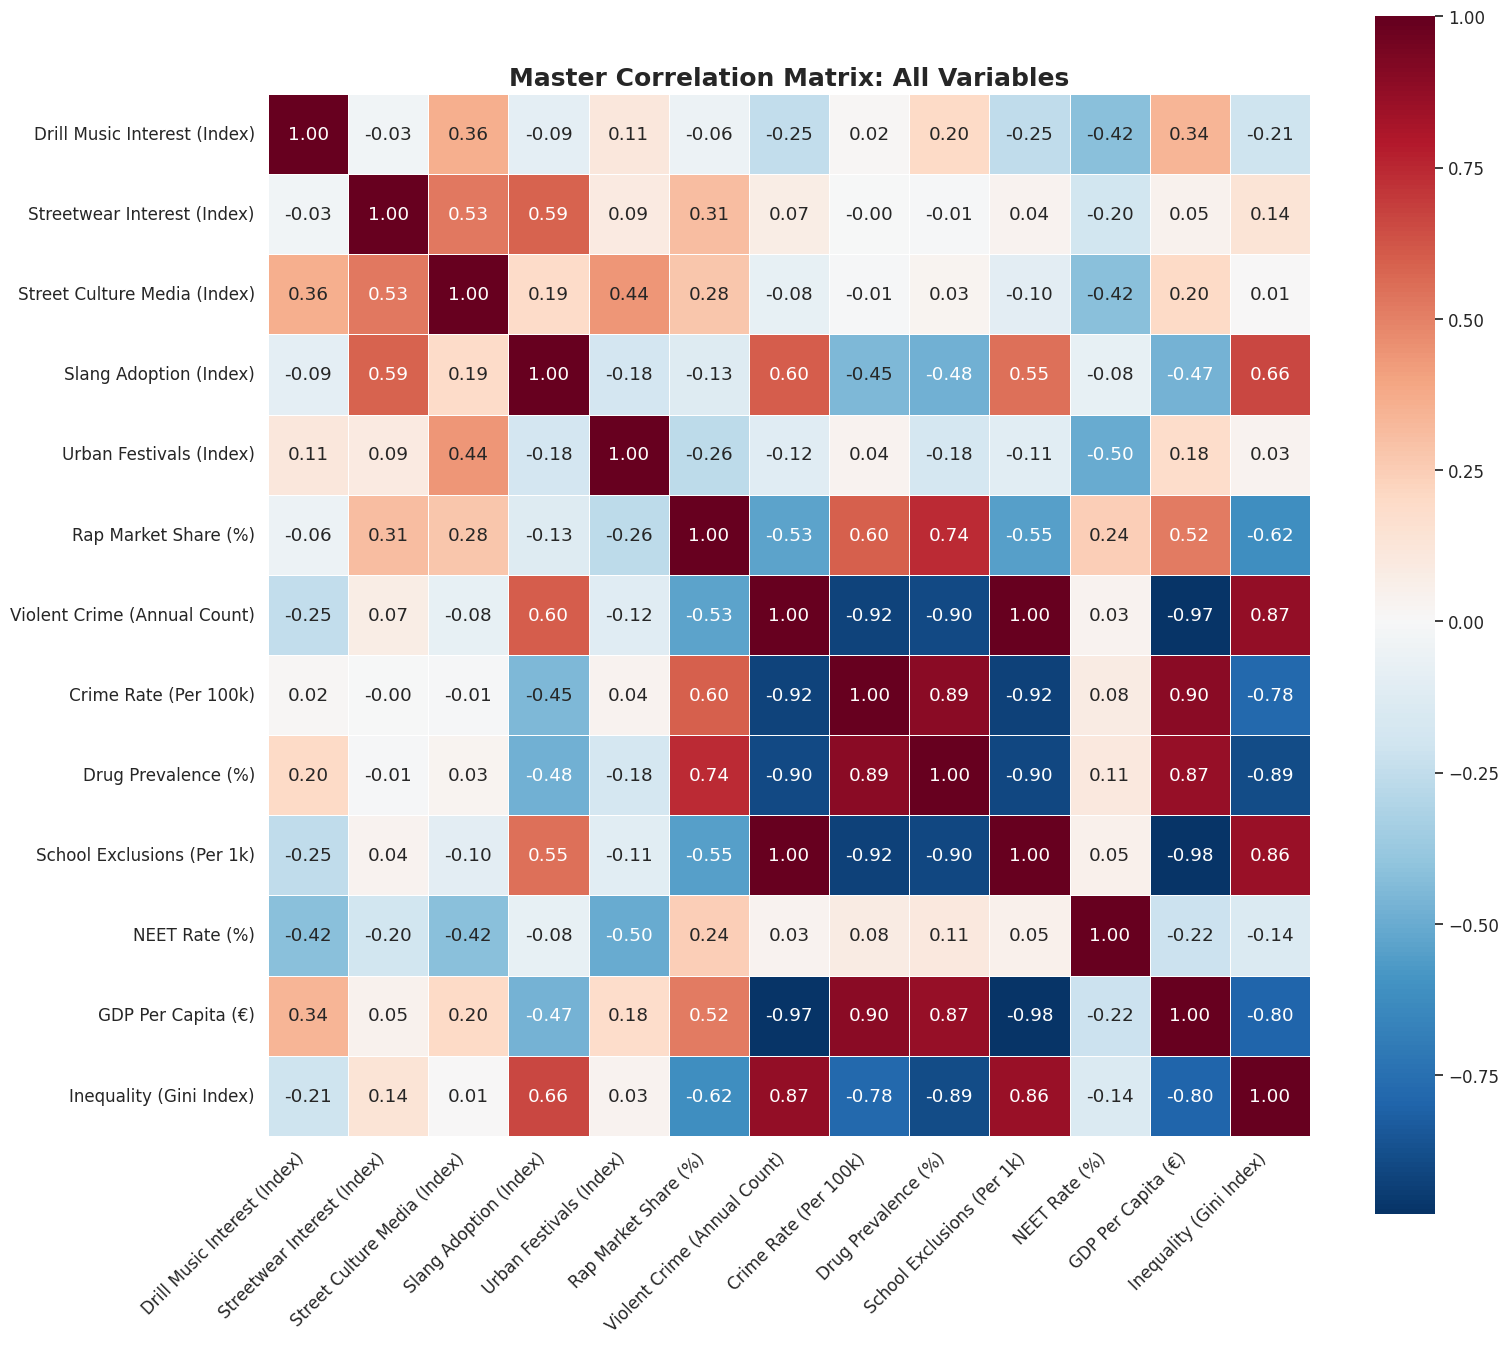

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD DATA
try:
    df = pd.read_csv('final_panel_dataset.csv')
    print("Dataset Loaded.")
except:
    print("Error: 'final_panel_dataset.csv' not found. Please ensure it is in the file directory.")


# 2. LABELING

label_map = {
    # Culture Metrics
    'music_drill': 'Drill Music Interest (Index)',
    'fashion_streetwear': 'Streetwear Interest (Index)',
    'media_tv': 'Street Culture Media (Index)',
    'language_slang': 'Slang Adoption (Index)',
    'events_festivals': 'Urban Festivals (Index)',
    'Rap_Market_Share': 'Rap Market Share (%)',

    # Risk Metrics
    'Violent_Crime_Count': 'Violent Crime (Annual Count)',
    'Crime_Rate_Eurostat': 'Crime Rate (Per 100k)',
    'Drug_Prevalence_Pct': 'Drug Prevalence (%)',
    'School_Exclusions': 'School Exclusions (Per 1k)',
    'NEET_Rate': 'NEET Rate (%)',

    # Controls
    'GDP_Per_Capita': 'GDP Per Capita (€)',
    'Gini_Index': 'Inequality (Gini Index)'
}

# Create a plotting dataframe with clean names
df_plot = df.rename(columns=label_map)

# Define Groups using the new names
culture_digital = [label_map[c] for c in ['music_drill', 'fashion_streetwear', 'media_tv', 'language_slang', 'events_festivals'] if c in df.columns]
culture_economic = [label_map['Rap_Market_Share']]
risk_crime = [label_map['Violent_Crime_Count'], label_map['Crime_Rate_Eurostat']]
risk_social = [label_map['Drug_Prevalence_Pct'], label_map['School_Exclusions'], label_map['NEET_Rate']]
controls = [label_map['GDP_Per_Capita'], label_map['Gini_Index']]

# Combine for Stats
all_metrics = culture_digital + culture_economic + risk_crime + risk_social + controls


# 3. DESCRIPTIVE STATISTICS

print("\n=== TABLE 1: SUMMARY STATISTICS (Clean Labels) ===")
stats = df_plot.groupby('Country')[all_metrics].mean().T
pd.set_option('display.max_rows', None)
print(stats)


# 4.VISUALIZATION DASHBOARD

sns.set_theme(style="whitegrid", font_scale=1.1)

def plot_group(columns, title, filename):
    # Filter columns that exist in the clean dataframe
    valid_cols = [c for c in columns if c in df_plot.columns]
    if not valid_cols: return

    # Create subplots
    fig, axes = plt.subplots(len(valid_cols), 1, figsize=(12, 5 * len(valid_cols)), sharex=True)
    if len(valid_cols) == 1: axes = [axes]

    for i, col in enumerate(valid_cols):
        # Plot line
        sns.lineplot(data=df_plot, x='Year', y=col, hue='Country', ax=axes[i], linewidth=2.5, marker='o')

        # Professional Formatting
        axes[i].set_title(col, fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col)
        axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
        axes[i].grid(True, alpha=0.4)

        # Rotate X-Axis Labels for individual subplots
        axes[i].tick_params(axis='x', rotation=45)

    # Final layout adjustments
    plt.xlabel("Year", fontsize=12)
    plt.xticks(rotation=45) # Rotate bottom-most axis
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16, weight='bold')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# --- GENERATE PLOTS ---
print("Generating 1. Digital Culture Trends...")
plot_group(culture_digital, "1. Digital Street Culture Trends", "eda_culture_digital.png")

print("Generating 2. Economic Validation...")
plot_group(culture_economic, "2. Economic Validation (Market Share)", "eda_culture_economic.png")

print("Generating 3. Crime Indicators...")
plot_group(risk_crime, "3. Youth Crime Indicators", "eda_crime.png")

print("Generating 4. Social Risk...")
plot_group(risk_social, "4. Social Risk Indicators", "eda_social_risk.png")

print("Generating 5. Controls...")
plot_group(controls, "5. Socioeconomic Controls", "eda_controls.png")


# 5. MASTER CORRELATION HEATMAP

plt.figure(figsize=(16, 14))

# Correlation Matrix
corr = df_plot[all_metrics].corr()

# Plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5, square=True)
plt.title('Master Correlation Matrix: All Variables', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right') # Rotate heatmap labels too
plt.tight_layout()
plt.savefig('master_correlation_matrix.png')
plt.show()

Here pearson correlation of each country is depicted by measuring the linearity in the visualisation followed by a lag analysis further analysing the correlation for each correlation coefficient.

Dataset Loaded.

=== TABLE 1: SUMMARY STATISTICS ===
Country                        France     Germany             UK
Rap_Market_Share    count   21.000000   21.000000      21.000000
                    mean    36.809524   13.016667       6.264286
                    std     13.275375    5.457472       4.078573
                    min     15.000000    3.500000       2.500000
                    25%     26.052632    8.571429       2.916667
                    50%     37.105263   13.642857       3.800000
                    75%     48.157895   18.600000      10.800000
                    max     57.000000   19.700000      12.400000
Violent_Crime_Count count   21.000000   21.000000      21.000000
                    mean     0.000000    0.000000  467377.928571
                    std      0.000000    0.000000   73950.791100
                    min      0.000000    0.000000  337709.000000
                    25%      0.000000    0.000000  408237.500000
                    50%      0.000000

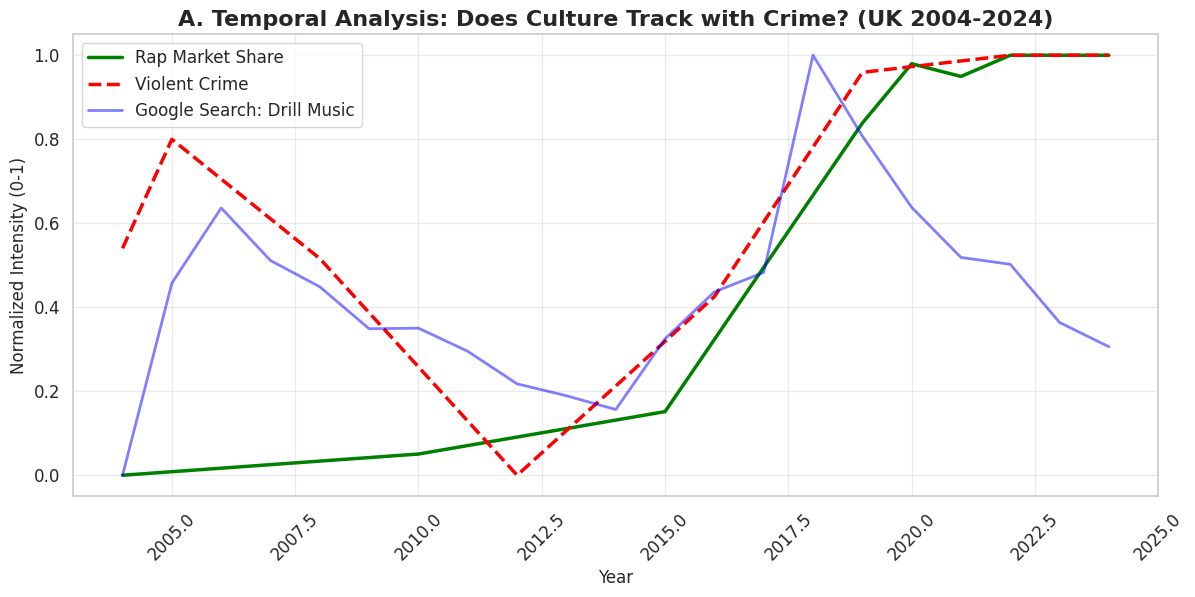

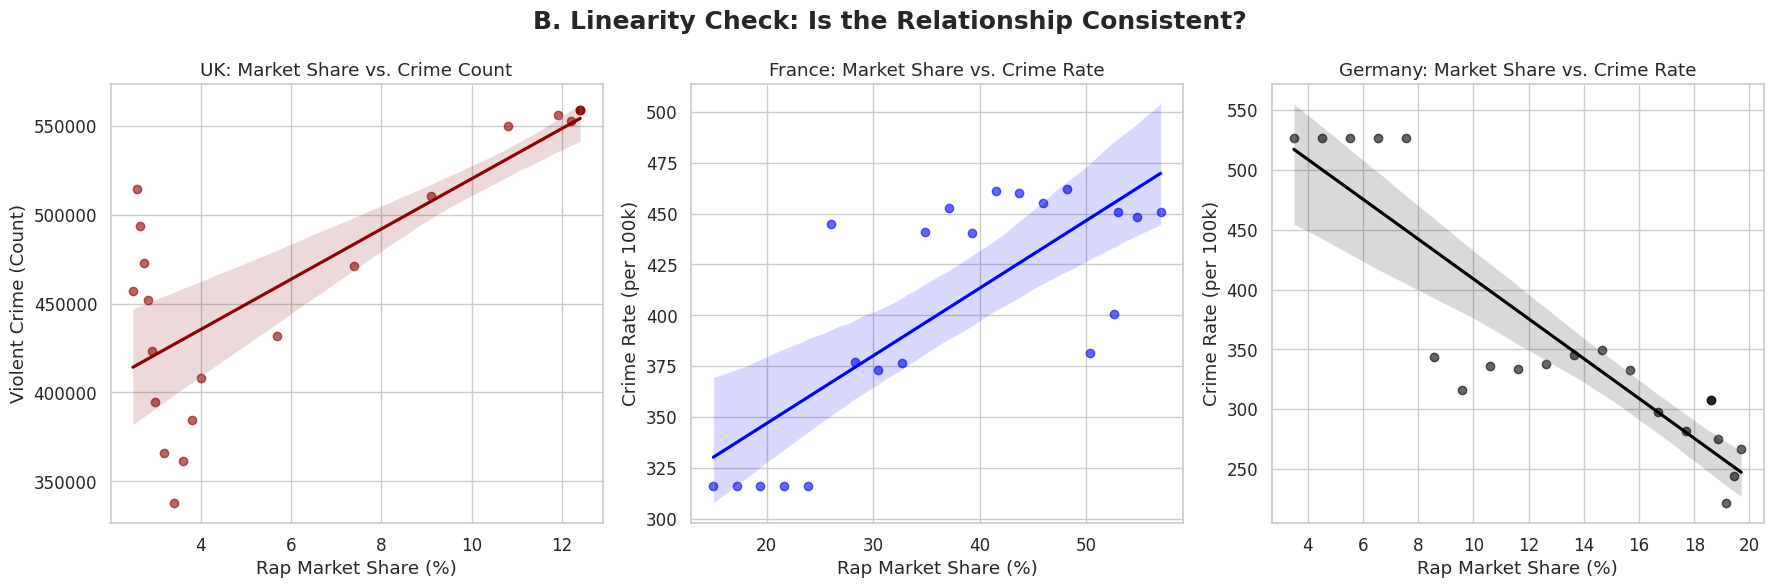

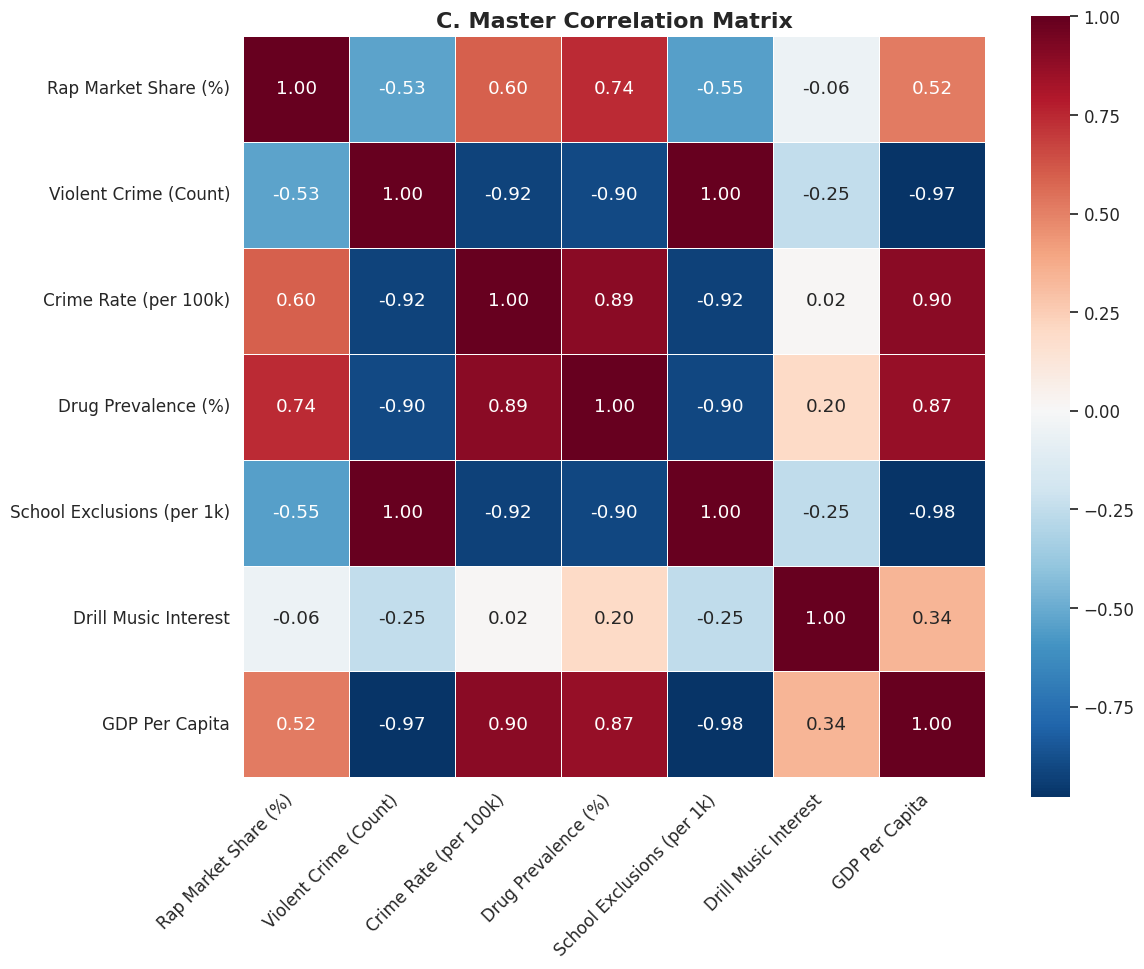

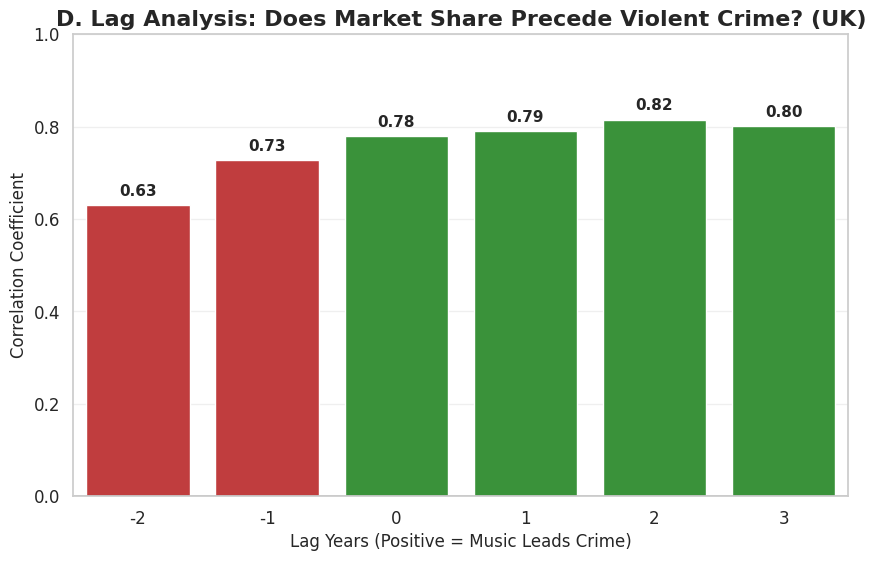

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

#Supress possible future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'figure.max_open_warning': 0})


# 1. SETUP & LOAD

try:
    df = pd.read_csv('final_panel_dataset.csv')
    print("Dataset Loaded.")
except:
    print("Error: 'final_panel_dataset.csv' not found.")

# Set Plot Style
sns.set_theme(style="whitegrid", font_scale=1.1)

# Helper to Normalize Data (0-1) for easy visual comparison
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())


# 2. LABELING

label_map = {
    'music_drill': 'Drill Music Interest',
    'Rap_Market_Share': 'Rap Market Share (%)',
    'Violent_Crime_Count': 'Violent Crime (Count)',
    'Crime_Rate_Eurostat': 'Crime Rate (per 100k)',
    'Drug_Prevalence_Pct': 'Drug Prevalence (%)',
    'School_Exclusions': 'School Exclusions (per 1k)',
    'GDP_Per_Capita': 'GDP Per Capita',
    'Year': 'Year'
}

df_plot = df.rename(columns=label_map)

# Define variables using new names
var_market = label_map['Rap_Market_Share']
var_crime_uk = label_map['Violent_Crime_Count']
var_crime_eu = label_map['Crime_Rate_Eurostat']
var_drill = label_map['music_drill']


# 3. DESCRIPTIVE STATISTICS

print("\n=== TABLE 1: SUMMARY STATISTICS ===")
stats = df.groupby('Country')[['Rap_Market_Share', 'Violent_Crime_Count', 'Crime_Rate_Eurostat']].describe().T
print(stats)


# 4. VISUALIZATION DASHBOARD


# --- CHART A: TEMPORAL TRENDS (With Date Rotation) ---
plt.figure(figsize=(14, 6))
uk_data = df_plot[df_plot['Country'] == 'UK']

plt.plot(uk_data['Year'], normalize(uk_data[var_market]), label='Rap Market Share', color='green', linewidth=2.5)
plt.plot(uk_data['Year'], normalize(uk_data[var_crime_uk]), label='Violent Crime', color='red', linewidth=2.5, linestyle='--')
plt.plot(uk_data['Year'], normalize(uk_data[var_drill]), label='Google Search: Drill Music', color='blue', alpha=0.5, linewidth=2)

plt.title('A. Temporal Analysis: Does Culture Track with Crime? (UK 2004-2024)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Intensity (0-1)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', frameon=True)
plt.grid(True, alpha=0.4)
plt.savefig('eda_trends_uk.png')
plt.show()

# --- CHART B: SCATTER PLOTS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# UK
sns.regplot(data=uk_data, x=var_market, y=var_crime_uk, ax=axes[0], color='darkred', scatter_kws={'alpha':0.6})
axes[0].set_title('UK: Market Share vs. Crime Count')

# France
fr_data = df_plot[df_plot['Country'] == 'France']
sns.regplot(data=fr_data, x=var_market, y=var_crime_eu, ax=axes[1], color='blue', scatter_kws={'alpha':0.6})
axes[1].set_title('France: Market Share vs. Crime Rate')

# Germany
de_data = df_plot[df_plot['Country'] == 'Germany']
sns.regplot(data=de_data, x=var_market, y=var_crime_eu, ax=axes[2], color='black', scatter_kws={'alpha':0.6})
axes[2].set_title('Germany: Market Share vs. Crime Rate')

plt.suptitle('B. Linearity Check: Is the Relationship Consistent?', fontsize=18, weight='bold')
plt.tight_layout()
plt.savefig('eda_scatter_linearity.png')
plt.show()

# --- CHART C: CORRELATION HEATMAP ---
plt.figure(figsize=(12, 10))

heatmap_cols = [label_map.get(c, c) for c in ['Rap_Market_Share', 'Violent_Crime_Count', 'Crime_Rate_Eurostat',
                'Drug_Prevalence_Pct', 'School_Exclusions', 'music_drill', 'GDP_Per_Capita'] if c in df.columns]

corr = df_plot[heatmap_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5, square=True)
plt.title('C. Master Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('eda_heatmap.png')
plt.show()

# --- CHART D: LAG ANALYSIS ---
uk_data_raw = df[df['Country'] == 'UK'].sort_values('Year').copy()
lags = [-2, -1, 0, 1, 2, 3]
corrs = []

for lag in lags:
    shifted_crime = uk_data_raw['Violent_Crime_Count'].shift(-lag)
    c = uk_data_raw['Rap_Market_Share'].corr(shifted_crime)
    corrs.append(c)

plt.figure(figsize=(10, 6))
colors = ['#d62728' if x < 0 else '#2ca02c' for x in lags]


sns.barplot(x=lags, y=corrs, hue=lags, palette=colors, legend=False)

plt.title('D. Lag Analysis: Does Market Share Precede Violent Crime? (UK)', fontsize=16, fontweight='bold')
plt.xlabel('Lag Years (Positive = Music Leads Crime)', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.ylim(0, 1.0)

for i, v in enumerate(corrs):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.savefig('eda_lag_analysis_fixed.png')
plt.show()